In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('covid.csv')
df.head()

,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018
0,4/6/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
1,4/5/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
2,4/4/2020,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
3,4/3/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
4,4/2/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0


In [5]:
df.shape

(9107, 10)

In [7]:
df.dtypes

date                     object
day                       int64
month                     int64
year                      int64
cases                     int64
deaths                    int64
countries                object
geoId                    object
countryterritoryCode     object
popData2018             float64
dtype: object

In [7]:
df['date']=pd.to_datetime(df['date'])

In [8]:
df.dtypes

date                     object
day                       int64
month                     int64
year                      int64
cases                     int64
deaths                    int64
countries                object
geoId                    object
countryterritoryCode     object
popData2018             float64
dtype: object

In [8]:
df['qtr']=df['date'].dt.quarter
df.head()

,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018,qtr
0,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0,2
1,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0,2
2,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0,2
3,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0,2
4,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0,2


In [9]:
df.columns

Index(['date', 'day', 'month', 'year', 'cases', 'deaths', 'countries', 'geoId',
       'countryterritoryCode', 'popData2018'],
      dtype='object')

In [11]:
df['qtr'].value_counts()

1    7835
2    1205
4      67
Name: qtr, dtype: int64

In [ ]:
# scatter plot

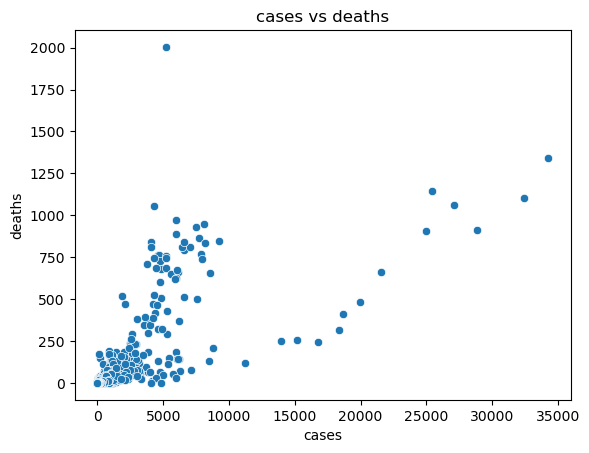

In [10]:
sns.scatterplot(data=df,x='cases',y='deaths')
plt.title('cases vs deaths')
plt.show()

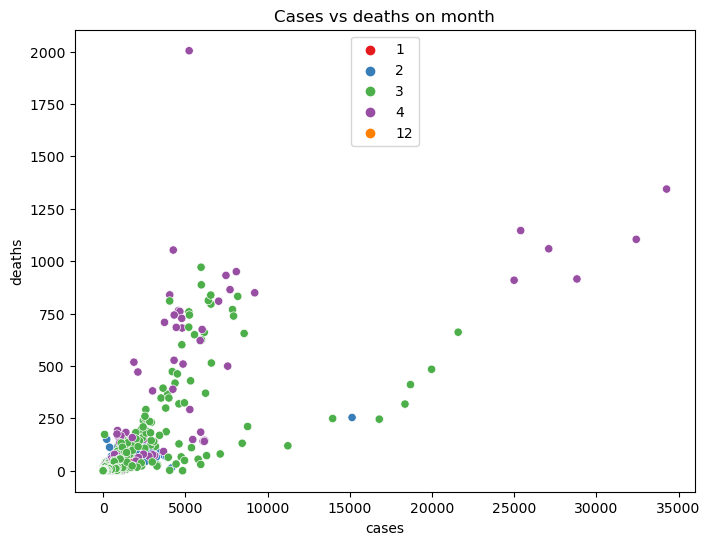

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='cases',y='deaths',hue='month',palette='Set1')
plt.title('Cases vs deaths on month')
plt.legend(loc=9)
plt.show()

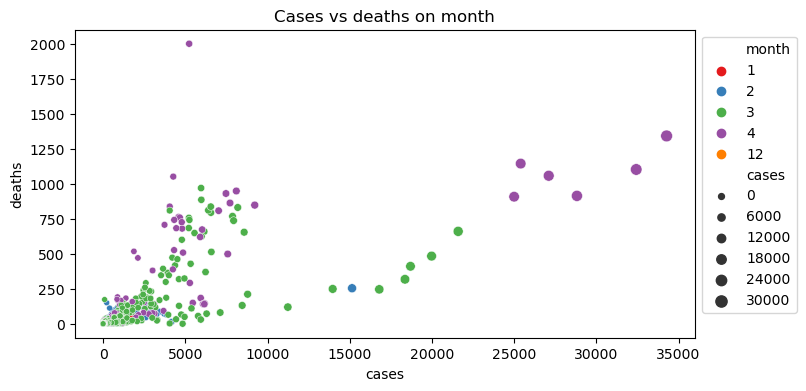

In [11]:
# PLOT scateer lot between cases and deathsbased on month where size of the 
#scatter plot is based on cases

plt.figure(figsize=(8,4))
sns.scatterplot(data=df,x='cases',y='deaths',hue='month',palette='Set1',size='cases')
plt.title('Cases vs deaths on month')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
# box plot

In [12]:
# plot month wise boxplot for covid cases for india for mar and apr

df_india=df[(df['countries']=='India') & (df['month'].isin([3,4]))]
df_india.shape

(36, 10)

In [25]:
df_india['countries'].value_counts()

India    36
Name: countries, dtype: int64

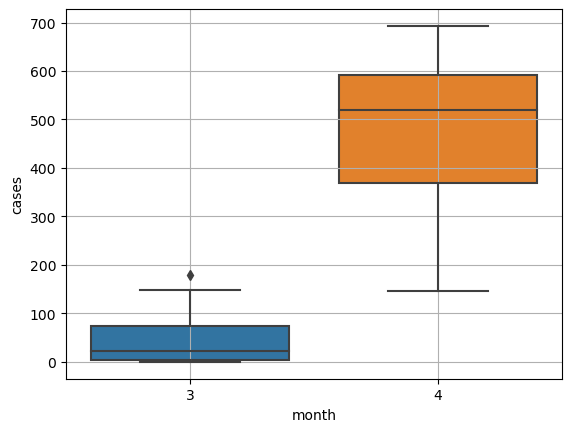

In [13]:
sns.boxplot(data=df_india,x='month',y='cases')
plt.grid()
plt.show()

In [21]:
#  plot boxplot for the number of cases for the countries begium,south africa,
# argentina portugal,switzerland

clist=['Belgium','South_Africa','Argentina','Portugal','Switzerland']
df_5c=df[df['countries'].isin(clist)]
df_5c.shape

(292, 10)

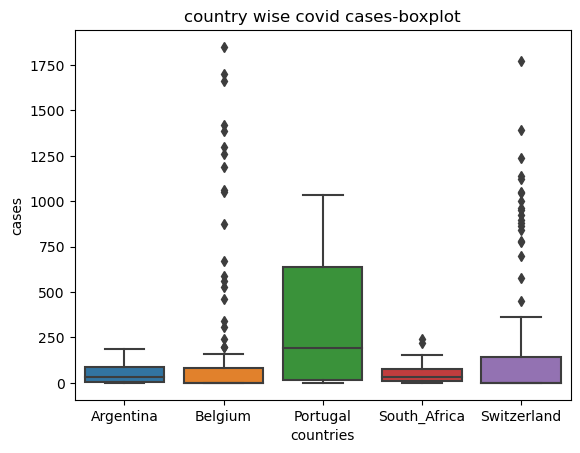

In [22]:
sns.boxplot(data=df_5c,x='countries',y='cases')
plt.title('country wise covid cases-boxplot')
plt.show()

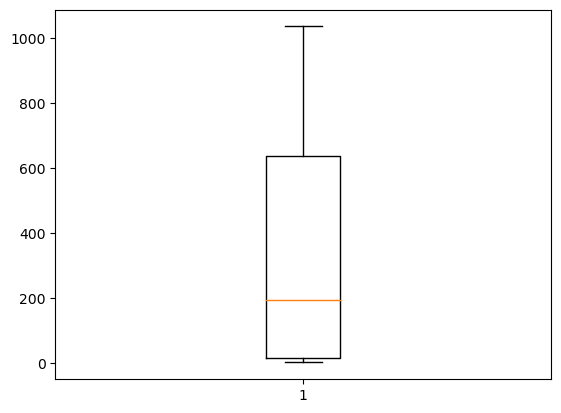

In [23]:
# plot boxplot fot the number of cases fot portugal
df_port=df[df['countries']=='Portugal']

plt.boxplot(data=df_port,x='cases')
plt.show()

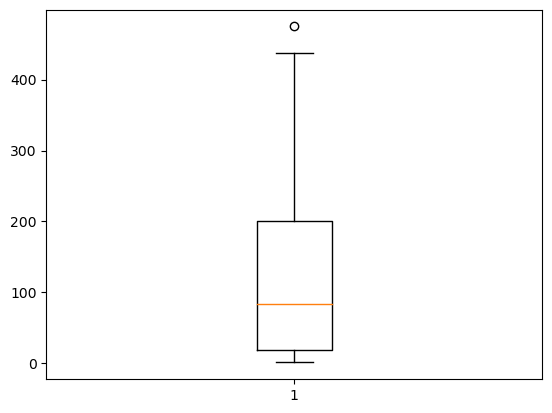

In [24]:
df_pol=df[df['countries']=='Poland']

plt.boxplot(data=df_pol,x='cases')
plt.show()

In [ ]:
#plot country wise number of case sum

In [16]:
r1=df.groupby(['countries'])['cases'].sum().reset_index()
r1[r1['cases'].between(200,400)]

,countries,cases
0,Afghanistan,299
1,Albania,361
31,Burkina_Faso,345
46,Cote_dIvoire,261
48,Cuba,320
75,Ghana,214
88,Honduras,298
102,Jordan,345
107,Kyrgyzstan,216
121,Malta,234


In [ ]:
# plot boxplot for the  countries 'Albania','San_Marino','Veitnam','Oman','Taiwan'

In [17]:
clist=['Albania','San_Marino','Vietnam','Oman','Taiwan']

df_r1=df[df['countries'].isin(clist)]
df_r1.shape

(408, 10)

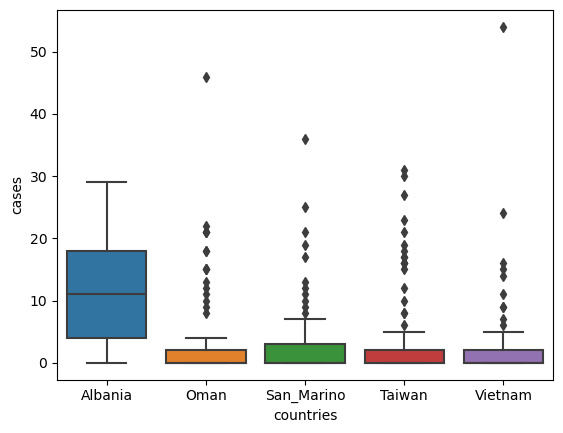

In [44]:
sns.boxplot(data=df_r1,x='countries',y='cases')
plt.show()

In [ ]:
# violin plot

In [18]:
print(df_india['countries'].value_counts())
print(df_india['month'].value_counts())

India    36
Name: countries, dtype: int64
3    30
4     6
Name: month, dtype: int64


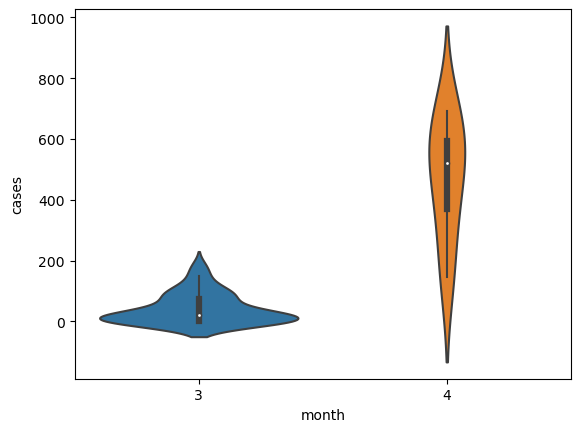

In [25]:
# plot month wise violine for covid cases for india for mar and apr

sns.violinplot(data=df_india,x='month',y='cases')
plt.show()

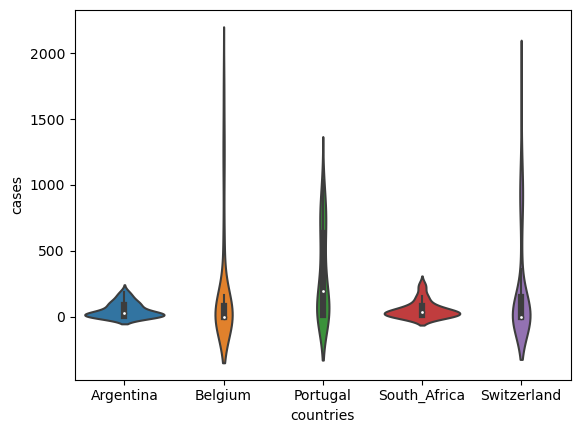

In [26]:
#plot violin plot for the nuber of cases fot countries switzerland belgium portugal
#argentina south africa

sns.violinplot(data=df_5c,x='countries',y='cases')
plt.show()

In [50]:
df_5c['month'].value_counts()

3     140
1      62
2      58
4      30
12      2
Name: month, dtype: int64

In [27]:
df_ma=df_5c[df_5c['month'].isin([3,4])]
df_ma.shape

(170, 10)

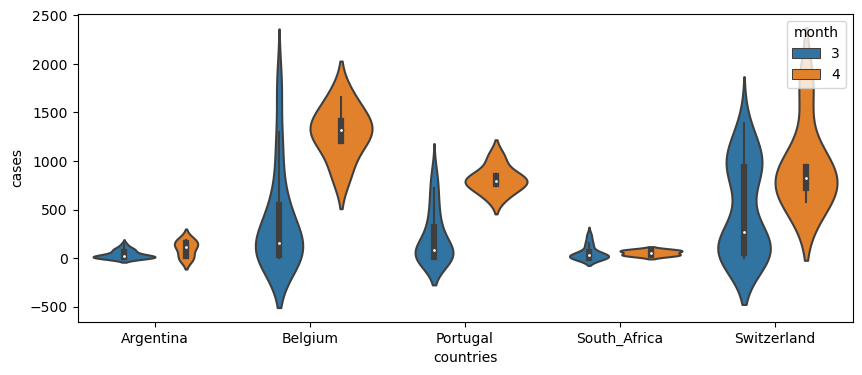

In [28]:
plt.figure(figsize=(10,4))
sns.violinplot(data=df_ma,x='countries',y='cases',hue='month')
plt.show()

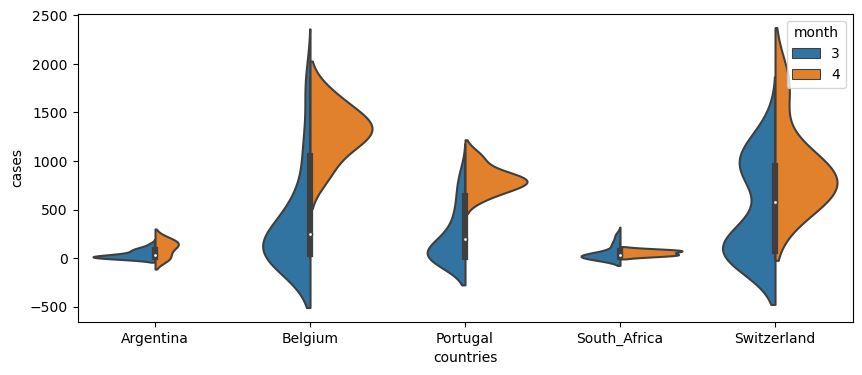

In [29]:
plt.figure(figsize=(10,4))
sns.violinplot(data=df_ma,x='countries',y='cases',hue='month',split=True)
plt.show()